# Agent 1

In [ ]:
1+22

In [3]:
import os
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv

In [4]:
load_dotenv()
model=os.getenv("DEPLOYMENT_NAME_LLM")
based_url=os.getenv("AZURE_AI_ENDPOINT_LLM")

In [5]:
class AgentState(TypedDict):
    messages: List[HumanMessage]

In [6]:
llm = ChatOpenAI(model=model,base_url=based_url)

In [7]:
def process(state: AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    print(f"\nAI: {response.content}")
    return state

In [8]:
process({'messages':'give me greek alphabests'})


AI: Here are the 24 letters of the Greek alphabet (uppercase, lowercase — name — common transliteration):

- Α α — Alpha — A  
- Β β — Beta — B (modern Greek: v)  
- Γ γ — Gamma — G (modern: g/ɣ)  
- Δ δ — Delta — D (modern: ð)  
- Ε ε — Epsilon — E  
- Ζ ζ — Zeta — Z  
- Η η — Eta — Ē (modern: i)  
- Θ θ — Theta — Th  
- Ι ι — Iota — I  
- Κ κ — Kappa — K  
- Λ λ — Lambda — L  
- Μ μ — Mu — M  
- Ν ν — Nu — N  
- Ξ ξ — Xi — X (ks)  
- Ο ο — Omicron — O  
- Π π — Pi — P  
- Ρ ρ — Rho — R  
- Σ σ/ς — Sigma — S (σ normally, ς used at word end)  
- Τ τ — Tau — T  
- Υ υ — Upsilon — Y/U (modern: i)  
- Φ φ — Phi — Ph/F (modern: f)  
- Χ χ — Chi — Ch/Kh (modern: x/χ)  
- Ψ ψ — Psi — Ps  
- Ω ω — Omega — Ō

If you want pronunciations, audio, or the Greek names spelled in Greek letters, tell me which and I’ll add them.


{'messages': 'give me greek alphabests'}

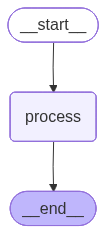

In [9]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END) 
agent = graph.compile()
agent

In [ ]:
user_input = input("Enter: ")
while user_input != "exit":
    agent.invoke({"messages": [HumanMessage(content=user_input)]})
    user_input = input("Enter: ")